In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

## Problem 2

We generate some noisy test data and 

Text(0.5, 1.0, 'True function and data points')

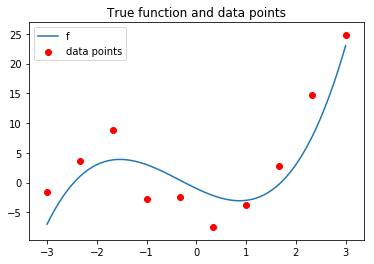

In [2]:
X_dense = np.linspace(-3,3,100)
X = np.linspace(-3,3,10)

def f(x):
    return x**3 + x**2 - 4*x - 1

Y_dense = list(map(f, X_dense))
plt.plot(X_dense,Y_dense)

Y_noisy = list(map(lambda x: f(x) + normal(0,5), X))
plt.scatter(X, Y_noisy, color = 'r')
plt.legend(['f','data points'])
plt.title('True function and data points')


Text(0.5, 1.0, 'True function and function obtained by regression')

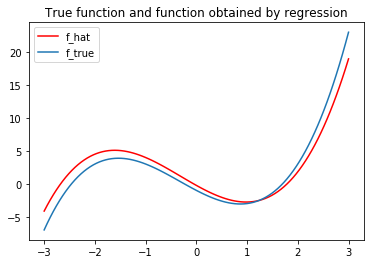

In [3]:
# now let's do the regression:
import random

data = np.ones((len(X),4))
for i,x in enumerate(X):
    data[i][1] = x
    data[i][2] = x**2
    data[i][3] = x**3
        
def roll_beta(i):
    random.seed(i)
    Y_noisy = list(map(lambda x: f(x) + normal(0,5), X))
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T), Y_noisy)
    return beta_hat

beta_0 = roll_beta(0)
def f_hat(x, beta):
    return sum([beta[i]*x**i for i in range(len(beta))])

plt.plot(X_dense, list(map(lambda x: f_hat(x,beta_0), X_dense)), color='r')
plt.plot(X_dense, Y_dense)
plt.legend(['f_hat', 'f_true'])
plt.title('True function and function obtained by regression')

Text(0.5, 1.0, 'Pointwise 95% CI')

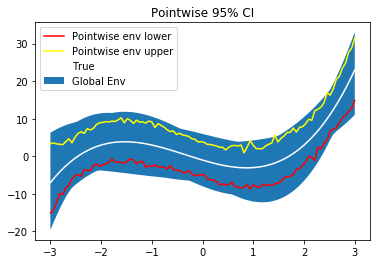

In [4]:
# method 1 - do a 95% CI for each point

lower_env, upper_env = [], []
for x in X_dense:
    # run the above 200 times and remove the highest 5 and lowest 5
    my_list = []
    for i in range(200):
        beta = roll_beta(i)
        my_list.append(f_hat(x, beta))
    results = sorted(my_list)
    lower_env.append(results[5])
    upper_env.append(results[-5])
    
lower_shade = Y_dense.copy()
upper_shade = Y_dense.copy()
for i in range(200):
    beta = roll_beta(i)
    for i, x in enumerate(X_dense):
        y = f_hat(x, beta)
        if y > upper_shade[i]:
            upper_shade[i] = y
        if y < lower_shade[i]:
            lower_shade[i] = y

plt.plot(X_dense, lower_env, color='r')
plt.plot(X_dense, upper_env, color='yellow')
plt.plot(X_dense, Y_dense, color='white')

plt.fill_between(X_dense, lower_shade, upper_shade)
plt.legend(["Pointwise env lower", "Pointwise env upper", "True", "Global Env"])
plt.title("Pointwise 95% CI")
        